### 1. Perform PCA on Stock Returns

Using stock returns at the daily (or monthly) level, perform a Principal Component Analysis (PCA) on daily (monthly) stock returns. 

- How many factors are needed to explain a reasonable proportion of the total variance in stock returns? 
  - *(There is no right answer to this, although there are standard share of variance measures that are some diagnostic tests).*
- **Hint**: What preprocessing should you do before performing PCA, and why?

#### Mathematical Foundation:
Principal Component Analysis (PCA) seeks to decompose the covariance matrix 
$ \Sigma $ of stock returns into eigenvalues $ \lambda_k $ and eigenvectors $ v_k $. The cumulative explained variance for $ K $ components is:

$$\text{Cumulative Variance} = \frac{\sum_{k=1}^K \lambda_k}{\sum_{k=1}^N \lambda_k}$$

### Formula for Explained Variance Ratio

For a given principal component \( i \), the explained variance ratio is:

$$
\text{Explained Variance Ratio (PC}_i\text{)} = \frac{\lambda_i}{\sum_{j=1}^{k} \lambda_j}
$$

Where:
- $ \lambda_i $: The eigenvalue corresponding to the \( i \)-th principal component (i.e., the variance captured by PC \( i \)).
- $ \sum_{j=1}^{k} \lambda_j $: The sum of eigenvalues for all \( k \) principal components (i.e., the total variance of the dataset).



<span style="color:red; font-weight:bold;">🔴 Important:</span> 
- Let’s include the **mathematical foundations and formulas** for this question to make it more mathematically descriptive. 
- Use information from the **PCA slides, APMA 1690, or reliable internet sources**, but ensure to **track citations** for all added content.
- Feel free to expand this section with further theoretical insights!

Sources I've used:
https://python.plainenglish.io/applying-pca-to-stocks-fbad2e51573f
https://www.pyquantnews.com/the-pyquant-newsletter/how-to-isolate-alpha-with-analysis

In [1]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

PLOTS = True

In [2]:
data = pd.read_csv("data/daily_ret_clean.csv").set_index("date")
stock_names = data.columns

In [ ]:
from sklearn.preprocessing import StandardScaler

# Preprocessing the Dataset
scaler = StandardScaler()
scaled = scaler.fit_transform(data)

### 2. Compute the First 5 Principal Components

Focus on a low number of factors: $ K = 5 $. Compute (based on the total sample for now) the $ K = 5 $ principal components.

- Each principal component should be a vector of length $ N $, the number of stocks in your universe.
- How can one translate a principal component vector $ v_k $ into a tradable portfolio? 
  - **Hint**: What should you do with the vector elements?

<span style="color:red; font-weight:bold;">🔴 Important:</span> 
- Let’s include the **mathematical foundations and formulas** for this question to make it more mathematically descriptive. 
- Use information from the **PCA slides, APMA 1690, or reliable internet sources**, but ensure to **track citations** for all added content.
- Feel free to expand this section with further theoretical insights!

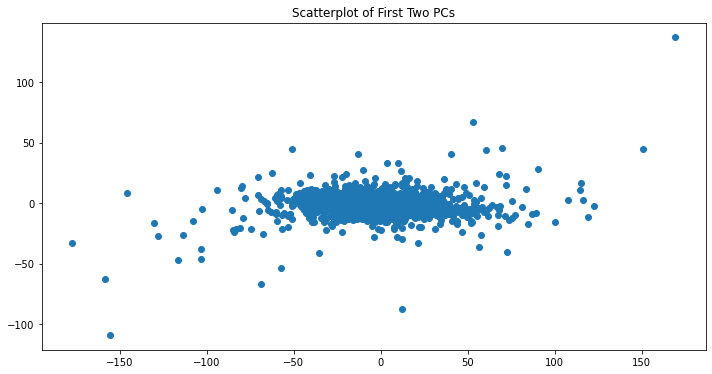

In [ ]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(scaled)
combined = np.concatenate([pca.components_, pca.explained_variance_ratio_.reshape(-1,1)], axis=1)
components = pd.DataFrame(
    pca.components_,
    columns=list(stock_names),# + ["Explained Var"],
    index=[f"PC{i+1}" for i in range(pca.n_components_)]
)

if PLOTS:
    plt.figure(figsize=(10,10))
    plt.subplot(2,1,2)
    plt.title("Scatterplot of First Two PCs")
    plt.scatter(X_pca[:,0], X_pca[:, 1])
    plt.tight_layout()

  Principal Component  Eigenvalue  Explained Variance (%)  \
0                 PC1  320.771439               26.704272   
1                 PC2   34.564010                2.877459   
2                 PC3   24.049584                2.002132   
3                 PC4   19.528084                1.625716   
4                 PC5   17.100488                1.423618   

   Cumulative Variance (%)  
0                26.704272  
1                29.581731  
2                31.583863  
3                33.209579  
4                34.633197  


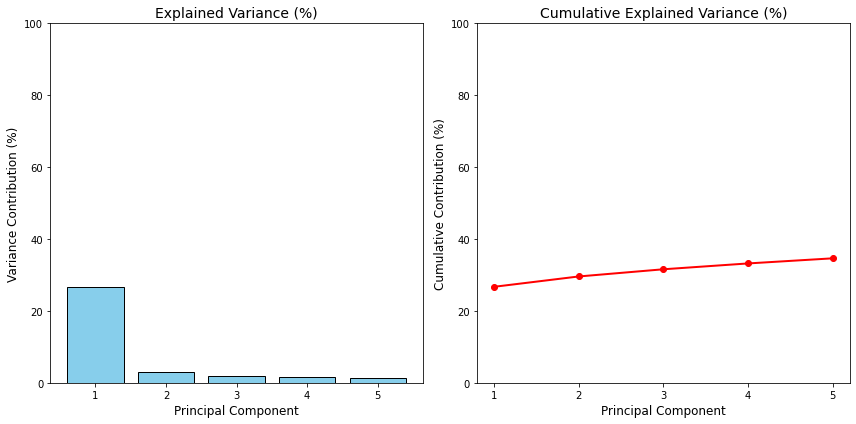

In [ ]:
eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

results_table = pd.DataFrame({
    'Principal Component': [f"PC{i}" for i in range(1, len(eigenvalues) + 1)],
    'Eigenvalue': eigenvalues,
    'Explained Variance (%)': explained_variance_ratio * 100,
    'Cumulative Variance (%)': cumulative_variance * 100
})

print(results_table)

# Plotting
x = np.arange(1, len(explained_variance_ratio) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(x, explained_variance_ratio * 100, align="center", color='skyblue', edgecolor='black')
plt.title('Explained Variance (%)', fontsize=14)
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Variance Contribution (%)', fontsize=12)
plt.xticks(x)
plt.ylim([0, 100])

plt.subplot(1, 2, 2)
plt.plot(x, cumulative_variance * 100, 'ro-', linewidth=2)
plt.title('Cumulative Explained Variance (%)', fontsize=14)
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Cumulative Contribution (%)', fontsize=12)
plt.xticks(x)
plt.ylim([0, 100])

plt.tight_layout()
plt.show()

### 3. Compute Factor Returns for Each Principal Component

For each principal component vector $ v_k $, compute the factor returns for the eigenportfolio:


$$f_k^t = \sum_i \frac{v_k[i]}{\bar{\sigma}_i} \cdot r_{i,t}$$

- Where $ \bar{\sigma}_i $ is the standard deviation of stock $ i $'s returns.
- **Question**: Why do we want to normalize $ v_k $ by the standard deviation?

In [6]:
weights = components/data.std(axis=0)
factor_returns = weights.dot(data.T) / len(stock_names)

print(components)
print(data.std(axis=0))
print(weights)
factor_returns

        10026     10032     10044     10065     10104     10107     10138  \
PC1  0.027385  0.030607  0.009365  0.048554  0.028938  0.032639  0.042889   
PC2 -0.004659 -0.021164  0.015391  0.013349 -0.013020 -0.002786 -0.017452   
PC3 -0.018421  0.062926  0.002129  0.036999  0.067057  0.064781  0.012635   
PC4  0.021820 -0.005004 -0.007809  0.022350  0.039897  0.044906  0.021698   
PC5 -0.001452 -0.034533 -0.004410  0.005228 -0.019722 -0.012022 -0.013101   

        10145     10200     10207  ...     88664     88912     89456  \
PC1  0.038647  0.014386  0.036388  ...  0.030571  0.024035  0.027168   
PC2 -0.002639 -0.004105  0.024122  ... -0.019646 -0.003426 -0.015054   
PC3  0.027349  0.028173  0.018530  ...  0.031261 -0.029602 -0.015443   
PC4  0.020827  0.012870 -0.021656  ...  0.045087 -0.024675 -0.009539   
PC5  0.018807 -0.017124  0.009194  ... -0.005206 -0.027341 -0.010027   

        89858     89915     90983     91287     91556     92655     92690  
PC1  0.026382  0.032863  0.0

date,2000-01-03,2000-01-04,2000-01-05,2000-01-06,2000-01-07,2000-01-10,2000-01-11,2000-01-12,2000-01-13,2000-01-14,...,2023-12-15,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-26,2023-12-27,2023-12-28,2023-12-29
PC1,-0.013647,-0.024354,0.008191,0.004578,0.021617,0.007603,-0.011226,-0.002393,0.013517,0.004526,...,-0.009168,0.000361,0.014004,-0.016265,0.014025,0.005578,0.008910,0.000755,-0.000027,-0.007557
PC2,0.009475,0.007648,0.005283,0.004736,0.002122,-0.000328,-0.003665,-0.001158,-0.004137,-0.001905,...,0.000198,0.001264,0.000315,-0.000565,0.000022,0.000327,-0.001743,0.001430,-0.002139,0.003419
PC3,0.009265,-0.011001,-0.002980,-0.009936,0.007922,0.015203,-0.003805,-0.001819,0.005017,0.010294,...,0.003950,0.001310,-0.001192,-0.000571,0.003217,-0.000287,-0.000903,0.000129,-0.000502,0.002534
PC4,-0.005519,-0.005629,0.005347,-0.000991,0.010118,0.002154,-0.001245,0.000348,0.000731,-0.001717,...,-0.003867,0.001277,-0.002477,-0.004517,-0.000597,0.000913,-0.002118,0.000619,0.003427,0.003041
PC5,-0.007376,0.000470,0.005812,0.006950,0.002727,-0.007355,0.003782,-0.000323,0.001652,-0.002929,...,-0.000689,0.003488,0.000020,-0.002172,0.000325,-0.000163,-0.000144,-0.001485,-0.000633,0.001800


### 4. Correlation of First Factor Return with Market Returns

Focus on the first factor return. What is its correlation with respect to market returns?

In [7]:
market_returns = np.mean(data, axis=1)
factor_returns.iloc[0].corr(market_returns)

np.float64(0.9957797261714537)

### 5. Regression for Each Stock to Estimate $ \alpha_i $

For each stock $ i $, run the regression:

$$r_{i,t} = \alpha_i + \sum_k \beta_{k,i} f_k^t + \epsilon_{i,t}$$

What is the interpretation of $ \alpha_i $?

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Sample data
X = factor_returns.T
Y = data

# Create a multi-output regression model
model = LinearRegression()
model.fit(X, Y)

coefs = pd.DataFrame(model.coef_, index=data.columns, columns=X.columns)
coefs["alpha"] = model.intercept_

coefs

,PC1,PC2,PC3,PC4,PC5,alpha
10026,0.677897,-0.115325,-0.455992,0.540137,-0.035943,0.000207
10032,1.201440,-0.830755,2.470060,-0.196434,-1.355553,0.000014
10044,0.309076,0.507966,0.070251,-0.257738,-0.145559,0.000371
10065,0.679103,0.186708,0.517480,0.312591,0.073116,-0.000197
10104,0.827907,-0.372503,1.918477,1.141431,-0.564237,-0.000087
...,...,...,...,...,...,...
90983,0.303922,0.394093,-0.417062,-0.542885,-0.109255,0.000433
91287,0.815815,0.487103,0.072117,-1.243715,-0.052718,0.000748
91556,0.783646,-0.200567,0.133245,0.452925,-0.480190,0.000384
92655,0.653097,0.529353,-0.132700,0.988606,0.568680,0.000368


In [9]:
alpha_returns = coefs["alpha"]
correlation = alpha_returns.corr(data.mean(axis=0))  # Mean stock returns
print(f"Alpha Correlation with Stock Returns: {correlation}")


Alpha Correlation with Stock Returns: 0.8158594444316903


In [10]:
# Backtest
weights = coefs["alpha"]/(np.sqrt(coefs["alpha"]**2).sum()) * 1000
1 + (np.e ** data - 1) * weights

,10026,10032,10044,10065,10104,10107,10138,10145,10200,10207,...,88664,88912,89456,89858,89915,90983,91287,91556,92655,92690
date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1.009361,0.999154,1.041184,1.002691,0.982181,1.000145,1.032339,1.010392,0.930998,0.992034,...,1.000560,1.019086,1.000536,1.007126,0.994608,1.027212,1.637783,0.956431,1.016042,1.002734
2000-01-04,0.938292,0.998679,1.023847,1.009410,1.027108,1.002993,1.020123,1.010574,1.000000,1.000000,...,0.962427,1.001917,1.000464,1.000000,0.981163,0.980224,0.563924,0.940379,0.982771,0.994635
2000-01-05,1.046541,0.999963,1.000000,1.005464,1.016490,0.999045,1.001238,1.008090,0.929604,0.997861,...,1.009834,0.990238,0.999755,1.015915,0.997210,1.006731,1.302299,1.032194,0.996810,1.000000
2000-01-06,1.002373,1.000074,0.881533,1.000000,1.018312,1.002969,0.979841,0.988191,1.073359,0.995750,...,0.995253,1.000000,1.000143,1.018729,1.028583,0.986679,0.948533,0.857278,1.050533,1.008327
2000-01-07,1.002366,1.000373,1.181518,0.997232,0.974404,0.998815,1.004807,0.966722,1.296403,1.004045,...,1.000000,1.016652,1.000263,1.003177,0.983940,1.000000,1.220170,0.982684,1.168727,0.997327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,1.005285,1.000320,1.012114,0.997100,0.998969,0.999749,0.993652,0.998258,1.012078,0.999362,...,1.005358,0.994067,1.000056,1.000000,1.009054,1.020423,1.000000,1.005620,1.001122,1.004825
2023-12-26,1.002916,1.000230,0.976239,0.993797,1.000030,0.999981,0.994974,0.992901,1.017397,0.999152,...,1.001400,0.994966,0.999887,1.001218,1.006491,1.000000,1.019459,1.006013,0.999271,1.004282
2023-12-27,0.995527,0.999422,0.978817,0.998774,1.000754,1.000142,1.000000,0.997145,1.001520,0.999156,...,0.993312,0.996476,0.999933,1.000242,1.003817,1.008990,1.019323,1.004230,1.007213,1.000936


### 6. How does this approach differ from standard factors (i.e. using market, value, momentum)?

This differs from a Fama-French style regression in that we don't have any external characteristics. In other words, we don't try to guess what the factors that impact the regression are. Instead, we purely try to estimate the factors from our returns. Interestingly, we actually manage to back out the CAPM market factor as shown by the high correlation of PC1 returns with the market.

### 7. Construct a Trading Strategy Based on $ \alpha_i $

Using your estimates of $ \alpha_i $, design a trading strategy. If you are looking for ideas, consider the following approach:

#### 1. Stock Sorting
- Sort all stocks based on their $ \alpha_i $ values:
  - **Top Quintile**: Go long on stocks in the top quintile of $ \alpha_i $ (highest alpha values).
  - **Bottom Quintile**: Go short on stocks in the bottom quintile of $ \alpha_i $ (lowest alpha values).
- This approach effectively bets on the overperformance of stocks with high $ \alpha_i $ and underperformance of stocks with low $ \alpha_i $.

#### 2. Portfolio Weights
- At any time $ t $, assign portfolio weights $ w_{i,t} $ to each stock $ i $. These weights can be positive (long positions) or negative (short positions).
- The total portfolio return for the next time step $ t+1 $ is calculated as:
  \[
  r_{\text{port}, t+1} = \sum_{i} w_{i,t} \cdot r_{i,t+1}
  \]
  where:
  - $ w_{i,t} $ is the weight of stock $ i $ at time $ t $,
  - $ r_{i,t+1} $ is the return of stock $ i $ at time $ t+1 $.

#### 3. Creativity Encouraged
- Feel free to explore more entrepreneurial or creative strategies. You could experiment with different weighting schemes, alpha adjustments, or factor exposures.

#### 4. Avoid Look-Ahead Bias
- Ensure your trading strategy does not rely on future returns (e.g., predicting $ r_{i,t+1} $ before $ t+1 $ happens). Use only past and current data available up to time $ t $.

#### 5. Practical Implementation
- A simple starting point might include:
  - **Equal Weights**: Assign equal weights to all stocks in the top and bottom quintiles.
  - **Risk Adjusted**: Normalize weights based on volatility or other risk measures for each stock.

---

<span style="color:red; font-weight:bold;">🔴 Important:</span> 
- Let’s include the **mathematical foundations and formulas** for this trading strategy to make it more descriptive and robust. 
- Use insights from the **PCA slides, APMA 1690, or external research papers** on trading strategies. 
- Ensure that all assumptions and data limitations are clearly cited. Expand this section with additional ideas or innovations! 

In [11]:
weights = coefs["alpha"] / coefs["alpha"].abs().sum()

# market neutrality
total_long = weights[weights > 0].sum()
total_short = weights[weights < 0].sum()
weights[weights > 0] /= total_long
weights[weights < 0] /= -total_short

normalized_portfolio_returns = (weights * data).sum(axis=1)

print("Portfolio Weights:")
print(weights)
print("\nPortfolio Returns:")
print(normalized_portfolio_returns)



Portfolio Weights:
10026    0.001112
10032    0.000073
10044    0.001988
10065   -0.002305
10104   -0.001021
           ...   
90983    0.002321
91287    0.004014
91556    0.002058
92655    0.001976
92690    0.000524
Name: alpha, Length: 1201, dtype: float64

Portfolio Returns:
date
2000-01-03    0.028026
2000-01-04    0.021324
2000-01-05    0.002827
2000-01-06    0.004364
2000-01-07   -0.009080
                ...   
2023-12-22    0.002379
2023-12-26   -0.000595
2023-12-27    0.000045
2023-12-28   -0.004452
2023-12-29    0.001756
Length: 6037, dtype: float64


In [12]:
# Check 1: Net exposure is zero
net_exposure = weights.sum()
print(f"Net Exposure: {net_exposure}")

if np.isclose(net_exposure, 0, atol=1e-8):
    print("Portfolio is market neutral in terms of net exposure.")
else:
    print("Portfolio is NOT market neutral in terms of net exposure.")

# Check 2: Long and short exposures are balanced
long_exposure = weights[weights > 0].sum()
short_exposure = weights[weights < 0].sum()  # This will be negative
print(f"Long Exposure: {long_exposure}")
print(f"Short Exposure: {short_exposure} (should be negative)")

if np.isclose(long_exposure, -short_exposure, atol=1e-8):
    print("Portfolio is market neutral in terms of balanced long and short exposures.")
else:
    print("Portfolio is NOT market neutral in terms of balanced long and short exposures.")


Net Exposure: -1.1102230246251565e-16
Portfolio is market neutral in terms of net exposure.
Long Exposure: 1.0
Short Exposure: -1.0 (should be negative)
Portfolio is market neutral in terms of balanced long and short exposures.


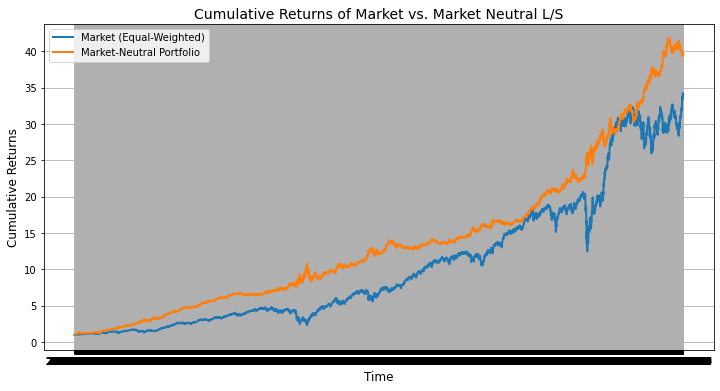

In [ ]:
market_returns = data.mean(axis=1)

market_cumulative = (1 + market_returns).cumprod()
portfolio_cumulative = (1 + normalized_portfolio_returns).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(market_cumulative, label="Market (Equal-Weighted)", linewidth=2)
plt.plot(portfolio_cumulative, label="Market-Neutral Portfolio", linewidth=2)

plt.title("Cumulative Returns of Market vs. Market Neutral L/S", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Cumulative Returns", fontsize=12)
plt.legend()
plt.grid(True)

plt.show()

### 8. Visualize and Report Cumulative Returns

Visualize and report the cumulative returns of the trading strategy. Let $ r_{\text{port}, t} $ represent the returns of your trading strategy for time $ t $.

#### Mathematical Foundation:
The cumulative returns up to time $ T $ can be calculated as:

$$\text{Cumulative Return}_T = \prod_{t=1}^{T} (1 + r_{\text{port}, t}) - 1$$

<span style="color:red; font-weight:bold;">🔴 Important:</span> 
- Let’s include the **mathematical foundations and visualization techniques** for this question. 
- Use insights from finance literature or PCA examples for calculating and plotting cumulative returns.

In [14]:
#Code goes here, Let's add visualizations/tables too

### 9. Compute the Sharpe Ratio

Compute the Sharpe ratio of your trading strategy. The Sharpe ratio measures the risk-adjusted return of a portfolio.

#### Mathematical Foundation:
The Sharpe ratio is given by:
\[
\text{Sharpe Ratio} = \frac{\mathbb{E}[r_{\text{port}}] - r_f}{\sigma_{\text{port}}}
\]
Where:
- $ \mathbb{E}[r_{\text{port}}] $ is the expected return of the portfolio,
- $ r_f $ is the risk-free rate,
- $ \sigma_{\text{port}} $ is the standard deviation of the portfolio returns.

<span style="color:red; font-weight:bold;">🔴 Important:</span> 
- Let’s include the **formulas, explanations, and interpretations** for the Sharpe ratio in the context of your strategy.
- Discuss assumptions like constant $ r_f $ and ensure proper citations if you use external resources.

### 10. Compute the Information Ratio

Compute the information ratio of your trading strategy:

- Formally, run the regression:

$$r_{\text{port}, t} = \alpha + \beta r_{\text{mkt}, t}$$
Your reference return (for the information ratio) should be $ \beta \cdot r_{\text{mkt}, t} $.


#### Mathematical Foundation:
1. Perform a regression:
$$r_{\text{port}, t} = \alpha + \beta r_{\text{mkt}, t} + \epsilon_t$$
Where:
- $ r_{\text{port}, t} $ is the portfolio return at time $ t $,
- $ r_{\text{mkt}, t} $ is the market return at time $ t $,
- $ \alpha $ is the portfolio’s alpha,
- $ \beta $ is the sensitivity to the market.

2. The information ratio is calculated as:

$$\text{Information Ratio} = \frac{\alpha}{\text{Tracking Error}}$$
Where the tracking error is the standard deviation of the residuals $ \epsilon_t $.

#### Questions:
- Is your strategy market neutral (i.e., $ \beta = 0 $)? Analyze and discuss.

<span style="color:red; font-weight:bold;">🔴 Important:</span> 
- Include **mathematical derivations and interpretations** for the information ratio.
- Use reliable references for definitions and ensure proper discussion of market neutrality.

In [16]:
#Code goes here, Let's add visualizations/tables too

### 11. Addressing Look-Ahead Bias

Note that you have estimated the PCA using the entire sample. Thus, your estimates of your trading performance should be somewhat positively biased. 

Now, repeat your exercise, where you simulate a trading strategy across time, where you:

1. Estimate your factors only based on data in the past (so at January 2015, you construct your PCAs using data up to January 2015).
2. Construct a trading strategy and see how this strategy performs.

A simple starting point is to estimate $ \alpha_i $'s using data prior to 2015 and assume $ \alpha_i $'s stay fixed afterwards. Of course, you can also update your $ \alpha_i $ estimates every day/month when you roll forward. 

Be very clear how you avoided the look-ahead bias. 

<span style="color:red; font-weight:bold;">🔴 Important:</span> 
- Include **mathematical derivations and interpretations** for the information ratio.
- Use reliable references for definitions and ensure proper discussion of market neutrality.

In [17]:
#Code goes here, Let's add visualizations/tables too

### 12. Evaluating Across Multiple Values of $ K $

Why stop at $ K = 5 $? Across multiple values of $ K $, re-do all of the above exercises.

- Which $ K $ seems to work best? 
- Is there a significant difference between in-sample assessments (where you estimate the factors based on all the data) and out-of-sample assessments (where you estimate the factors only based on data available at the time and roll forward)?

Discuss.

<span style="color:red; font-weight:bold;">🔴 Important:</span> 
- Include **mathematical derivations and interpretations** for the information ratio.
- Use reliable references for definitions and ensure proper discussion of market neutrality.